In [3]:
import pandas as pd
import numpy as np 

In [8]:
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt 


In [13]:
RISKY_ASSET = 'META' 
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2017-12-01' 
END_DATE = '2022-10-31'


In [15]:
df=yf.download(
    [RISKY_ASSET, MARKET_BENCHMARK],
    start = START_DATE,
    end= END_DATE,
    adjusted = True,
    progress=False)


In [16]:
df

Adj Close                    Close                     High  \
                  META        ^GSPC        META        ^GSPC        META   
Date                                                                       
2017-12-01  175.100006  2642.219971  175.100006  2642.219971  177.479996   
2017-12-04  171.470001  2639.439941  171.470001  2639.439941  176.570007   
2017-12-05  172.830002  2629.570068  172.830002  2629.570068  175.380005   
2017-12-06  176.059998  2629.270020  176.059998  2629.270020  176.770004   
2017-12-07  180.139999  2636.979980  180.139999  2636.979980  180.389999   
...                ...          ...         ...          ...         ...   
2022-10-24  129.720001  3797.340088  129.720001  3797.340088  133.479996   
2022-10-25  137.509995  3859.110107  137.509995  3859.110107  138.350006   
2022-10-26  129.820007  3830.600098  129.820007  3830.600098  135.550003   
2022-10-27   97.940002  3807.300049   97.940002  3807.300049  102.500000   
2022-10-28   99.199997  3901.060059   99.199997  3901.060059  100.849998   

                                Low                     Open               \
                  ^GSPC        META        ^GSPC        META        ^GSPC   
Date                                                                        
2017-12-01  2650.620117  172.339996  2605.520020  176.029999  2645.100098   
2017-12-04  2665.189941  170.789993  2639.030029  176.289993  2657.189941   
2017-12-05  2648.719971  169.009995  2627.729980  170.449997  2639.780029   
2017-12-06  2634.409912  171.899994  2624.750000  172.500000  2626.239990   
2017-12-07  2640.989990  175.800003  2626.530029  175.800003  2628.379883   
...                 ...         ...          ...         ...          ...   
2022-10-24  3810.739990  124.570000  3741.649902  127.250000  3762.010010   
2022-10-25  3862.850098  130.589996  3799.439941  130.880005  3799.439941   
2022-10-26  3886.149902  128.529999  3824.070068  131.679993  3825.969971   
2022-10-27  3859.949951   96.379997  3803.790039   97.980003  3834.689941   
2022-10-28  3905.419922   97.510002  3808.260010   99.580002  3808.260010   

               Volume              
                 META       ^GSPC  
Date                               
2017-12-01   20182500  3950930000  
2017-12-04   24459400  4025840000  
2017-12-05   20184900  3547570000  
2017-12-06   20255800  3253080000  
2017-12-07   20404500  3297060000  
...               ...         ...  
2022-10-24   63563400  4747930000  
2022-10-25   38433200  4843120000  
2022-10-26   82791500  4817310000  
2022-10-27  232316600  4687320000  
2022-10-28   95928300  4459410000  

[1236 rows x 12 columns]

In [17]:
X=df['Adj Close'].rename(columns={RISKY_ASSET:'asset_return',
                            MARKET_BENCHMARK:'market_return'})\
                            .resample('MS')\
                            .last()\
                            .pct_change()\
                            .dropna()
X

,asset_return,market_return
Date,,
2018-01-01,0.059107,0.056179
2018-02-01,-0.045856,-0.038947
2018-03-01,-0.103914,-0.026884
2018-04-01,0.076413,0.002719
2018-05-01,0.115000,0.021608
2018-06-01,0.013244,0.004842
2018-07-01,-0.111877,0.036022
2018-08-01,0.018252,0.030263
2018-09-01,-0.064132,0.004294


In [20]:
import pandas_datareader.data as web

In [21]:
Risk_free_rate = web.DataReader('TB3MS', 'fred', start='2018-01-01',end=END_DATE,)

In [22]:
rf = (1+(Risk_free_rate/100))**(1/12)-1

<AxesSubplot: title={'center': 'Risk free rate (3 months treasury bill)'}, xlabel='DATE'>

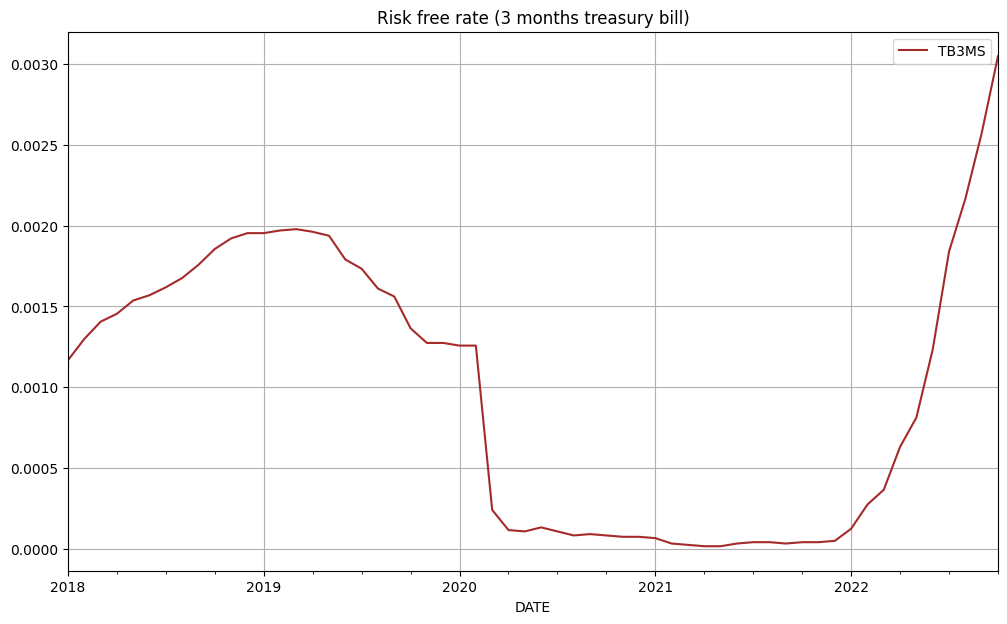

In [23]:
rf.plot(title="Risk free rate (3 months treasury bill)"
, figsize=(12,7),grid = True,color="brown")

In [24]:
df_premium=X.assign(TB3MS=rf['TB3MS'],assert_premium=X['asset_return']-rf['TB3MS'],market_premium=X['market_return']-rf['TB3MS'])
df_premium

,asset_return,market_return,TB3MS,assert_premium,market_premium
Date,,,,,
2018-01-01,0.059107,0.056179,0.001167,0.057939,0.055011
2018-02-01,-0.045856,-0.038947,0.001299,-0.047155,-0.040246
2018-03-01,-0.103914,-0.026884,0.001406,-0.105320,-0.028290
2018-04-01,0.076413,0.002719,0.001455,0.074958,0.001264
2018-05-01,0.115000,0.021608,0.001537,0.113463,0.020071
2018-06-01,0.013244,0.004842,0.001570,0.011675,0.003273
2018-07-01,-0.111877,0.036022,0.001619,-0.113496,0.034403
2018-08-01,0.018252,0.030263,0.001676,0.016576,0.028587
2018-09-01,-0.064132,0.004294,0.001758,-0.065890,0.002536


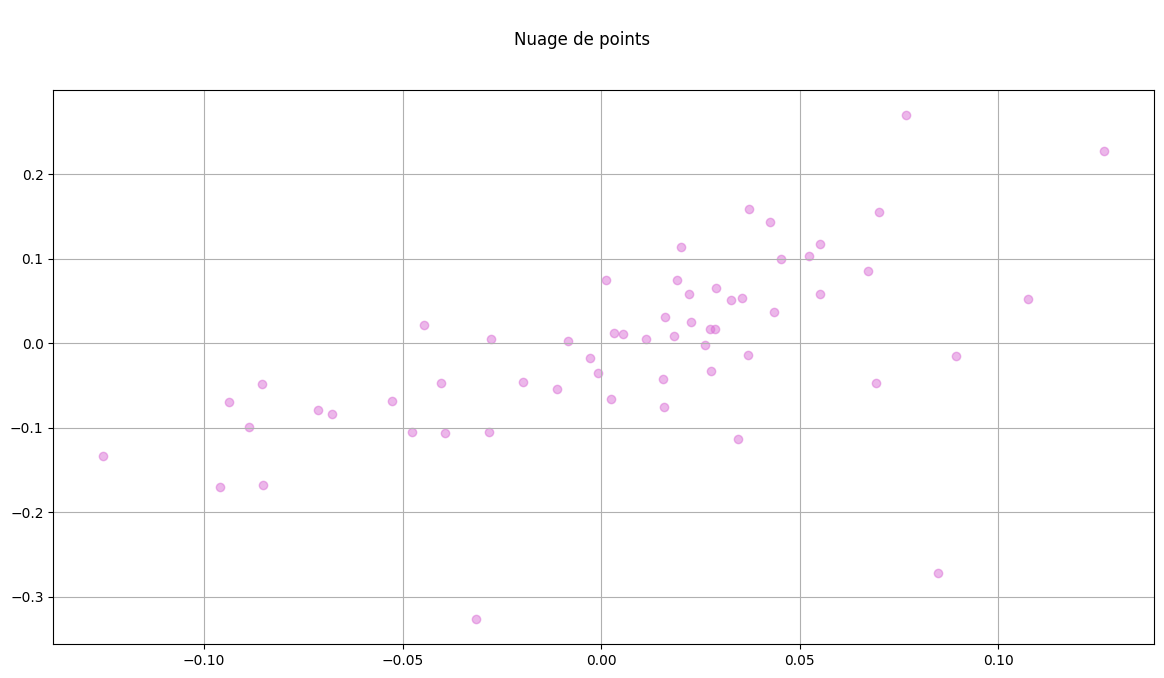

In [46]:
x=df_premium['market_premium']
y=df_premium['assert_premium']
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x,y,alpha=0.5,color='orchid')
fig.suptitle("\n"'Nuage de points')
fig.tight_layout(pad=2)
ax.grid(True)


In [47]:
max_x = df_premium['market_premium'].max()
min_x = df_premium['market_premium'].min()
x=sm.add_constant(x)
model=sm.OLS(y,x)
fitted=model.fit()



In [48]:
n_obs=len(x)
print(n_obs)
x_pred=np.linspace(min_x,max_x,n_obs)
x_pred2=sm.add_constant(x_pred)

58


In [49]:
y_pred=fitted.predict(x_pred2)
print(y_pred)


[-0.15684796 -0.15177714 -0.14670633 -0.14163552 -0.1365647  -0.13149389
 -0.12642308 -0.12135226 -0.11628145 -0.11121064 -0.10613982 -0.10106901
 -0.09599819 -0.09092738 -0.08585657 -0.08078575 -0.07571494 -0.07064413
 -0.06557331 -0.0605025  -0.05543169 -0.05036087 -0.04529006 -0.04021924
 -0.03514843 -0.03007762 -0.0250068  -0.01993599 -0.01486518 -0.00979436
 -0.00472355  0.00034726  0.00541808  0.01048889  0.01555971  0.02063052
  0.02570133  0.03077215  0.03584296  0.04091377  0.04598459  0.0510554
  0.05612621  0.06119703  0.06626784  0.07133866  0.07640947  0.08148028
  0.0865511   0.09162191  0.09669272  0.10176354  0.10683435  0.11190516
  0.11697598  0.12204679  0.12711761  0.13218842]


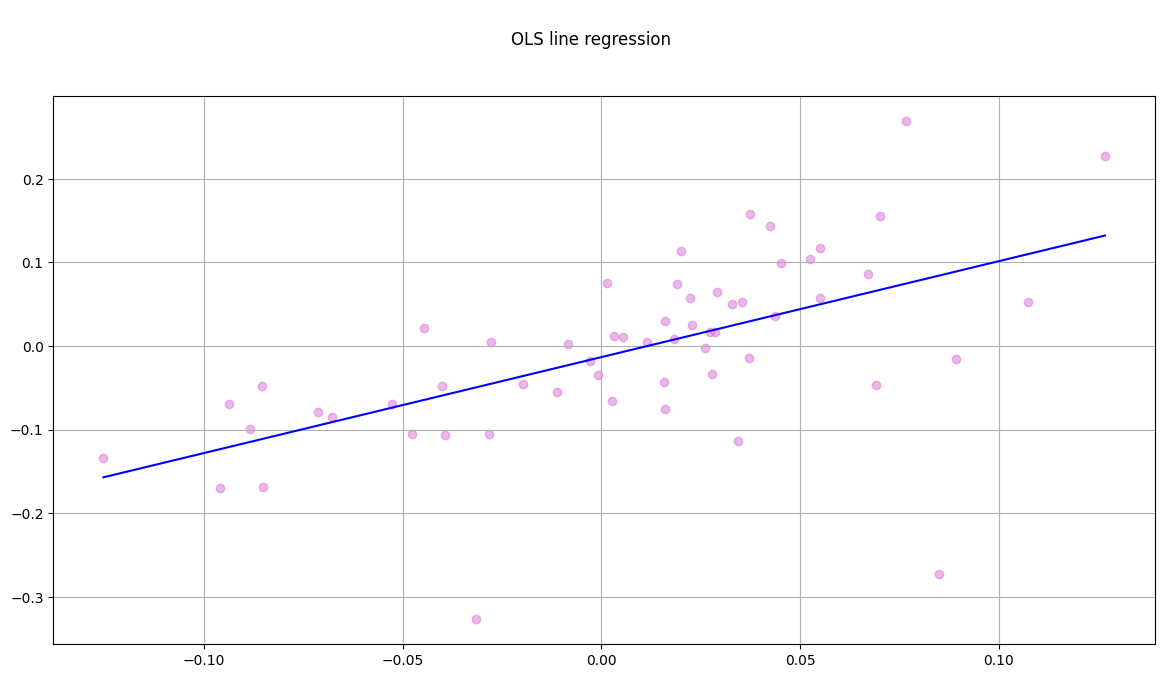

In [56]:
fig, ax= plt.subplots(figsize=(12,7))
fig.suptitle("\n"'OLS line regression ')
fig.tight_layout(pad=2)
ax.grid(True)
ax.plot(x_pred,y_pred,'-',color='blue')
x1=df_premium['market_premium']
y1=df_premium['assert_premium']
ax.scatter(x1,y1,alpha=0.5,color='orchid')
fig.savefig('OLS line regression.png',dpi=125)


In [51]:
import numpy as np
array = np.cov(X['asset_return'],X['market_return'])
beta =array[0][1]/array[1][1]
print(beta)

1.1427812338533467


In [52]:
import statsmodels.api as sm
model = sm.OLS(X['asset_return'], X['market_return'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           asset_return   R-squared (uncentered):                   0.324
Model:                            OLS   Adj. R-squared (uncentered):              0.312
Method:                 Least Squares   F-statistic:                              27.33
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    2.54e-06
Time:                        21:49:25   Log-Likelihood:                          59.650
No. Observations:                  58   AIC:                                     -117.3
Df Residuals:                      57   BIC:                                     -115.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [53]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X['market_return'],X['asset_return'])

print(slope)

1.1427812338533465


In [54]:
from scipy import stats
t= stats.t.ppf(1-0.025, df = 45)
df_premium

,asset_return,market_return,TB3MS,assert_premium,market_premium
Date,,,,,
2018-01-01,0.059107,0.056179,0.001167,0.057939,0.055011
2018-02-01,-0.045856,-0.038947,0.001299,-0.047155,-0.040246
2018-03-01,-0.103914,-0.026884,0.001406,-0.105320,-0.028290
2018-04-01,0.076413,0.002719,0.001455,0.074958,0.001264
2018-05-01,0.115000,0.021608,0.001537,0.113463,0.020071
2018-06-01,0.013244,0.004842,0.001570,0.011675,0.003273
2018-07-01,-0.111877,0.036022,0.001619,-0.113496,0.034403
2018-08-01,0.018252,0.030263,0.001676,0.016576,0.028587
2018-09-01,-0.064132,0.004294,0.001758,-0.065890,0.002536


In [55]:
y_hat = fitted.predict(x)
x = df_premium['market_premium']
y_err = y - y_hat

mean_x = x.T[1].mean()
dof = n_obs - fitted.df_model - 1
from scipy import stats

t = stats.t.ppf(1-0.025,df=dof)
s_err = np.sum(np.power(y_err,2))
conf = t * np.sqrt((s_err/(n_obs-2))*(1/n_obs + (np.power((x_pred-mean_x),2)/((np.sum(np.power(x_pred,2))) - n_obs*(np.power(mean_x,2))))))

conf_pred = t * np.sqrt((s_err/(n_obs-2)))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)

upper_pred = y_pred + abs(conf_pred)
lower_pred = y_pred - abs(conf_pred)
fig.suptitle('Confidence interval for the regression')
ax.plot(x_pred,lower,'-.',color='r',linewidth=0.5)
ax.plot(x_pred,upper,'-.',color='r',linewidth=0.5)

ax.fill_between(x_pred,lower,upper,color='#888888',alpha = 1)
fig.savefig('Confidence_interval_reg.png',dpi=125)
fig.suptitle('Confidence interval for the prediction and regression')
ax.plot(x_pred,lower_pred,'-.',color='r',linewidth=0.5)
ax.plot(x_pred,upper_pred,'-.',color='r',linewidth=0.5)

ax.fill_between(x_pred,lower_pred,upper_pred,color='#888888',alpha = 0.4)

fig.savefig('Confidence_interval_pred_reg.png',dpi=125)

In [48]:
x

Date
2018-01-01    0.055011
2018-02-01   -0.040246
2018-03-01   -0.028290
2018-04-01    0.001264
2018-05-01    0.020071
2018-06-01    0.003273
2018-07-01    0.034403
2018-08-01    0.028587
2018-09-01    0.002536
2018-10-01   -0.071259
2018-11-01    0.015938
2018-12-01   -0.093731
2019-01-01    0.076731
2019-02-01    0.027759
2019-03-01    0.015946
2019-04-01    0.037351
2019-05-01   -0.067715
2019-06-01    0.067140
2019-07-01    0.011395
2019-08-01   -0.019702
2019-09-01    0.015620
2019-10-01    0.019067
2019-11-01    0.032773
2019-12-01    0.027315
2020-01-01   -0.002886
2020-02-01   -0.085368
2020-03-01   -0.125361
2020-04-01    0.126727
2020-05-01    0.045174
2020-06-01    0.018255
2020-07-01    0.054993
2020-08-01    0.069981
2020-09-01   -0.039320
2020-10-01   -0.027749
2020-11-01    0.107471
2020-12-01    0.037046
2021-01-01   -0.011203
2021-02-01    0.026058
2021-03-01    0.042414
2021-04-01    0.052409
2021-05-01    0.005470
2021-06-01    0.022181
2021-07-01    0.022706
2021-0